<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Visualization_Seaborn_Tutorial_Numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [0]:
"""
The scatter plot is a mainstay of statistical visualization. It depicts the joint 
distribution of two variables using a cloud of points, where each point 
represents an observation in the dataset. 
"""

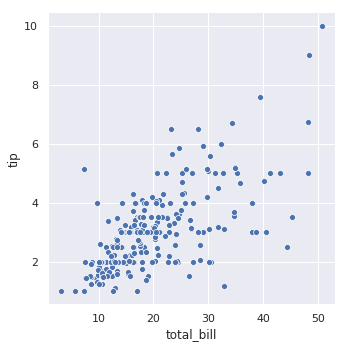

In [3]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips)

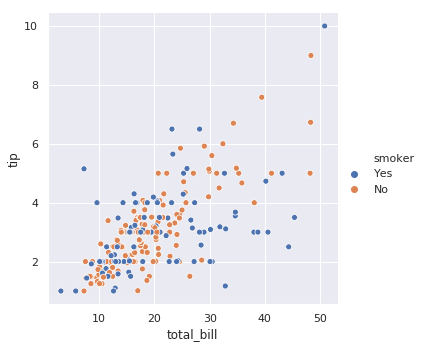

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

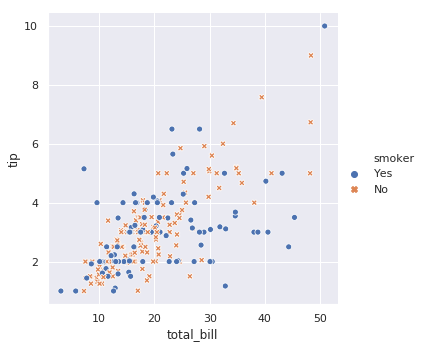

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


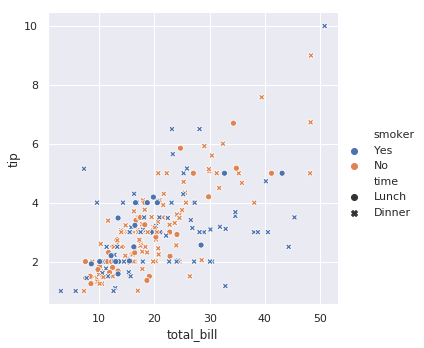

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

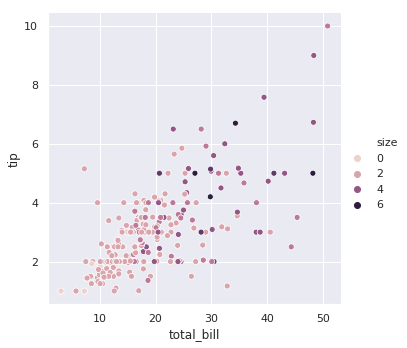

In [9]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

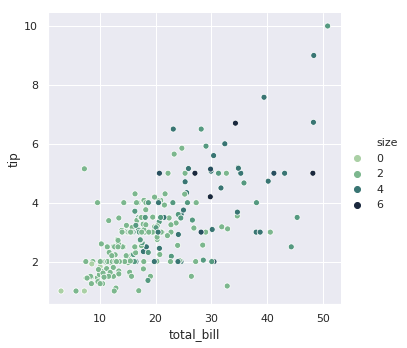

In [10]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips)

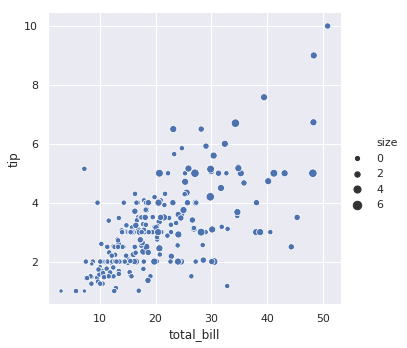

In [12]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips)

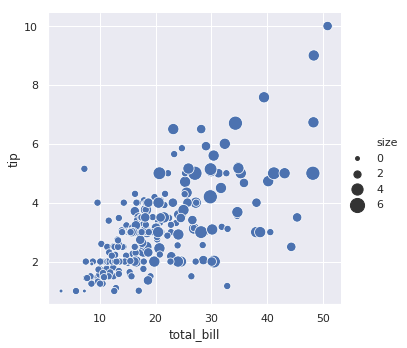

In [13]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

In [0]:
"""
Emphasizing continuity with line plots
"""

In [0]:
rng = np.random.RandomState(42)
df = pd.DataFrame(dict(time=np.arange(500),
                       value=rng.randn(500).cumsum()))

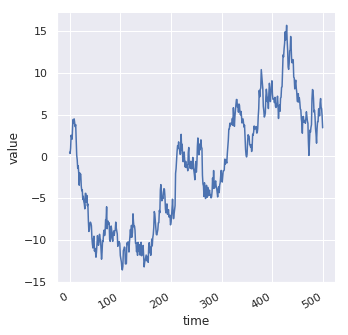

In [16]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

In [0]:
"""
Aggregation and representing uncertainty
By plotting the mean and the 95% confidence interval around the mean
"""

In [17]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


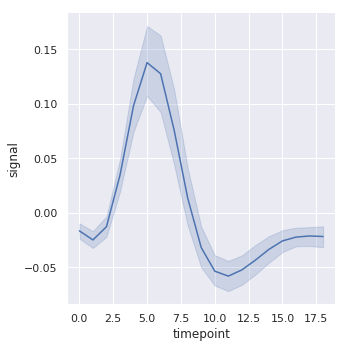

In [18]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)
"""
The confidence intervals are computed using bootstrapping, which can be 
time-intensive for larger datasets. 
"""

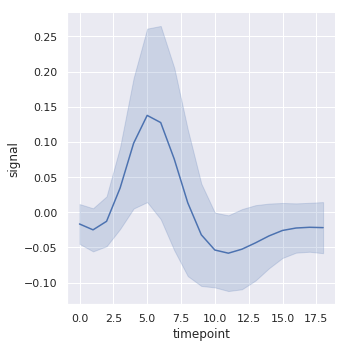

In [19]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)
"""
represent the spread of the distribution at each timepoint by plotting the 
standard deviation instead of a confidence interval:
"""

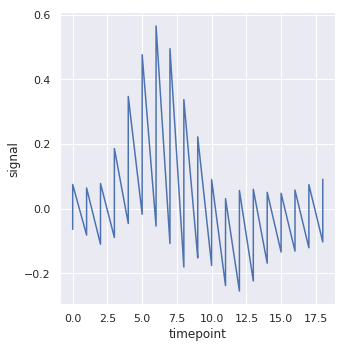

In [20]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri)

In [0]:
"""
Plotting subset of data with semantic mappings
"""

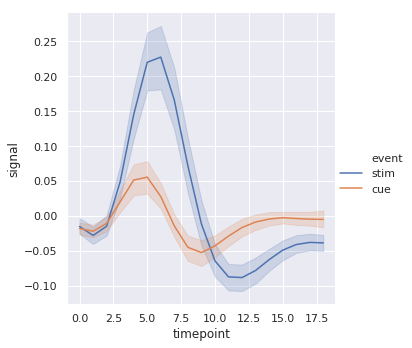

In [22]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

In [0]:
"""
Adding a style semantic to a line plot changes the pattern 
of dashes in the line
"""

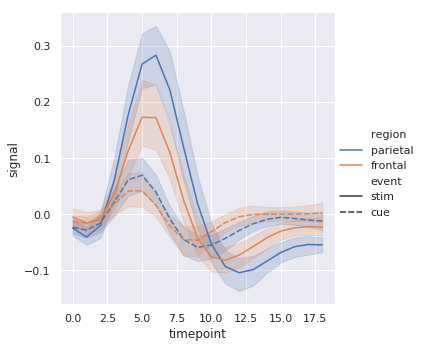

In [23]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri)

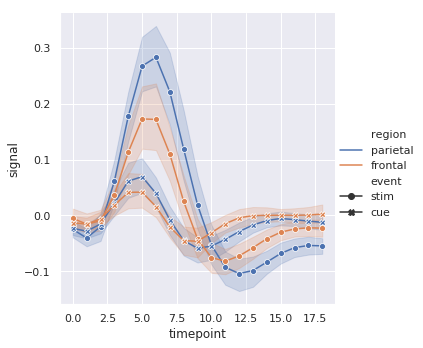

In [25]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", dashes = False, markers=True, kind="line", data=fmri)

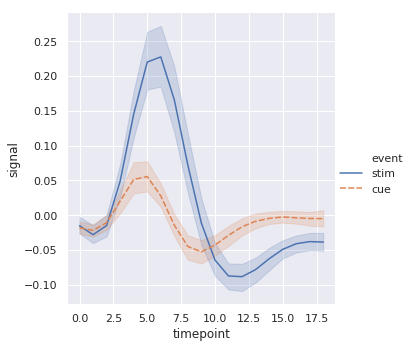

In [26]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event", kind="line", data=fmri)

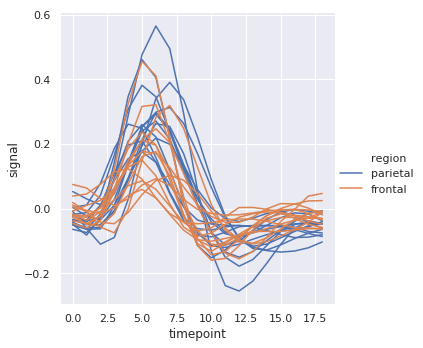

In [27]:
sns.relplot(x="timepoint", y="signal", hue="region", units="subject", estimator=None, kind="line", data=fmri.query("event == 'stim'"))

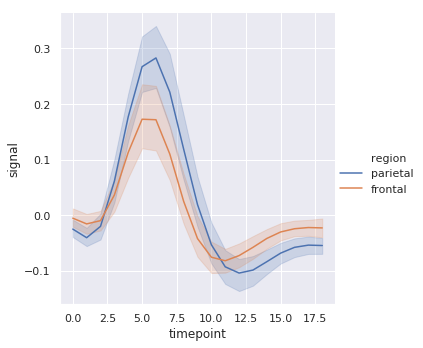

In [29]:
sns.relplot(x="timepoint", y="signal", hue="region", kind="line", data=fmri.query("event == 'stim'"))

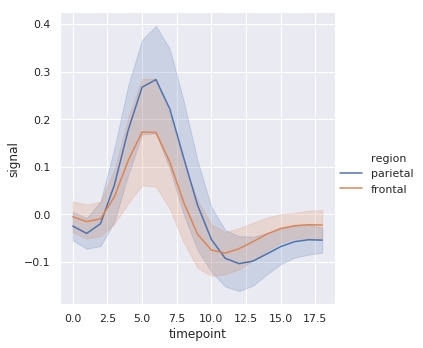

In [30]:
sns.relplot(x="timepoint", y="signal", hue="region", kind="line", ci="sd", data=fmri.query("event == 'stim'"))

In [0]:
dots = sns.load_dataset("dots").query("align == 'dots'")

In [32]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


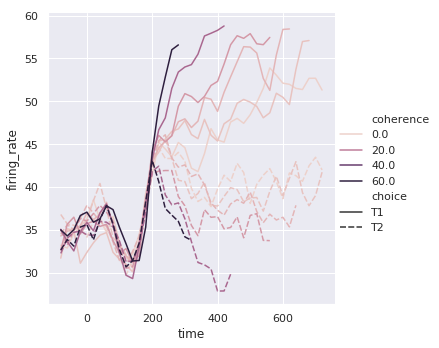

In [33]:
sns.relplot(x="time", y="firing_rate", hue="coherence", style="choice", kind="line", data=dots)

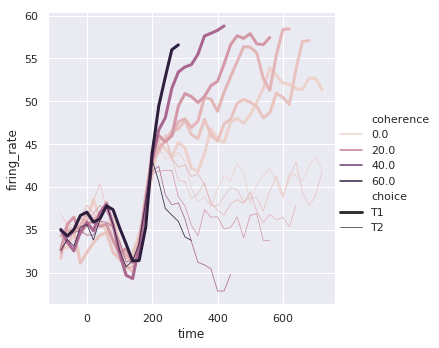

In [34]:
sns.relplot(x="time", y="firing_rate", hue="coherence", size="choice", kind="line", data=dots)

In [0]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))

In [36]:
df.head()

,time,value
0,2017-01-01,0.422430
1,2017-01-02,0.173997
2,2017-01-03,-0.218179
3,2017-01-04,-1.198514
4,2017-01-05,-0.598634


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


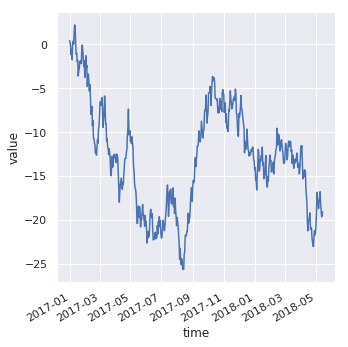

In [37]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

In [0]:
"""
Showing multiple relationships with facets
"""

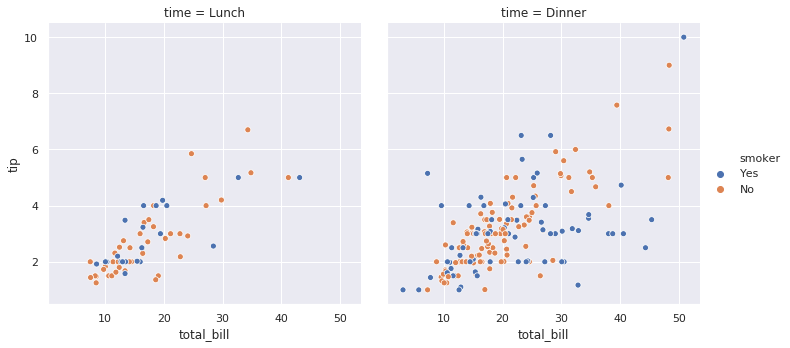

In [38]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

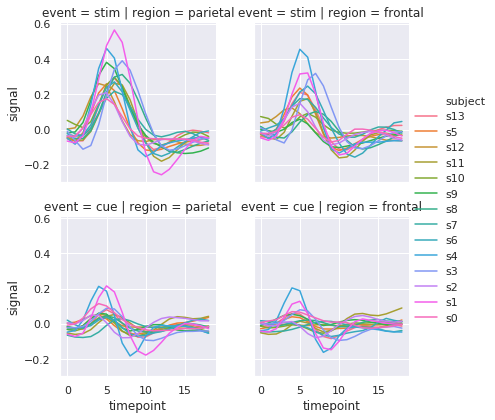

In [40]:
sns.relplot(x="timepoint", y="signal", hue="subject", col="region", row="event", height=3, kind="line", estimator=None, data=fmri)

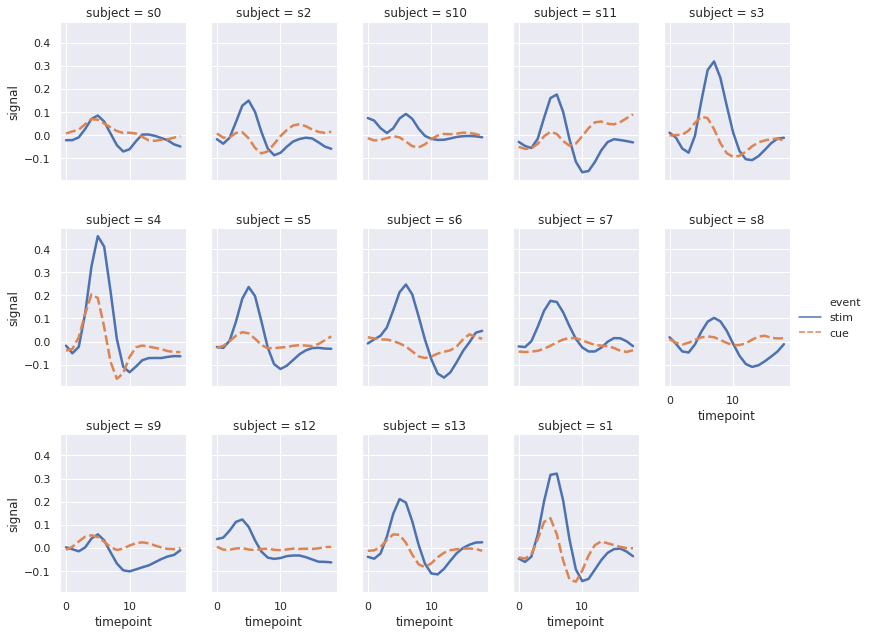

In [41]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event", col="subject", 
            col_wrap=5, height=3, aspect=0.75, linewidth=2.5, kind="line", data=fmri.query("region == 'frontal'"))